<a href="https://colab.research.google.com/github/haxiaww/sentiment-prediction-app/blob/app/NLP_T%E1%BB%95ng_h%E1%BB%A3p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
## Thư viện
import imageio
import joblib            as jlb
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import seaborn           as sns

import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn                 import tree
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


#preprocess

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
print('Các cột hiện có của bộ dữ liệu:')
for col in df.columns:
  print(f'-> {col}')
print(f'\nSố dòng hiện có của bộ dữ liệu: {df.shape[0]}')

Các cột hiện có của bộ dữ liệu:
-> Id
-> ProductId
-> UserId
-> ProfileName
-> HelpfulnessNumerator
-> HelpfulnessDenominator
-> Score
-> Time
-> Summary
-> Text

Số dòng hiện có của bộ dữ liệu: 568454


Text(0.5, 0, 'biểu đồ tròn biến Score')

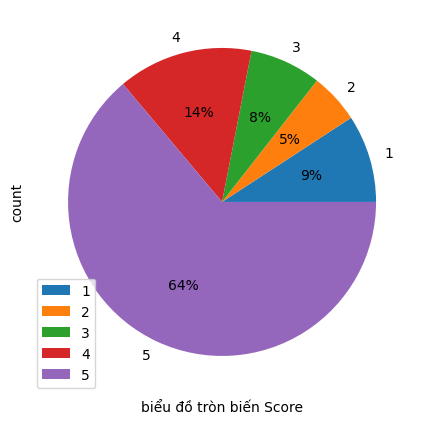

In [ ]:
gb=pd.DataFrame(df.groupby(['Score']).size().reset_index(name='count'))
plot = gb.plot.pie(y='count',labels=gb.Score, figsize=(5, 5), autopct='%1.0f%%')
plt.xlabel('biểu đồ tròn biến Score')

#cleaning

##missing value,duplicate

In [ ]:
#kiểm tra null
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
##xóa null
df.dropna(axis='rows',inplace=True)

In [ ]:
#kiểm tra lại null
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
##kiểm tra trùng
df.duplicated().sum()

0

In [ ]:
#giữ lại 3 cột text và score và summary
data=df[['Summary','Text','Score']]

In [ ]:
#convert {1,2,3} -> negative, {4,5} -> positive
data.loc[data['Score']==1,'Score']='negative'
data.loc[data['Score']==2,'Score']='negative'
data.loc[data['Score']==3,'Score']='negative'
data.loc[data['Score']==4,'Score']='positive'
data.loc[data['Score']==5,'Score']='positive'

In [ ]:
#lấy 50k dòng data
filt1= (data['Score']=='negative')
filt2= (data['Score']=='positive')
df1=data.loc[filt1][:25000]
df2=data.loc[filt2][:25000]

In [ ]:
data = pd.concat([df1, df2], axis=0).sort_index()

In [ ]:
data['Text']=data['Summary']+' '+data['Text']
del data['Summary']

In [ ]:
data=data.reset_index()
del data['index']
data

,Text,Score
0,Good Quality Dog Food I have bought several of...,positive
1,Not as Advertised Product arrived labeled as J...,negative
2,"""Delight"" says it all This is a confection tha...",positive
3,Cough Medicine If you are looking for the secr...,negative
4,Great taffy Great taffy at a great price. The...,positive
...,...,...
49995,It's just ok My baby is a wonderful eater and ...,negative
49996,"Watery, flavorless, sour Agree with the review...",negative
49997,"Very thick and dry We love happybaby products,...",negative
49998,My baby and my cat won't eat this! We had orde...,negative


##xóa kí tự

###remove special character

In [ ]:
import string
punct=string.punctuation

In [ ]:
def remove(text):
  text=re.sub(r'[0-9]+','',text).lower()#xóa số
  text=re.sub(r'(www|http)\S+', '', text) #xóa URL
  text=text.translate(str.maketrans('','',punct)) #xóa punctuation
  return text

###remove stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in set(stopword_list)])

###change abbreviation


In [ ]:
def abbreviation(text):
  #Điều này có nghĩa là nó coi trích dẫn đơn là một ký tự chữ chứ không phải là
  #một ký tự đặc biệt với ý nghĩa thông thường trong biểu thức chính quy
  text=re.sub(r'can\'t','can not',text)
  text=re.sub(r'n\'t','not',text)
  text=re.sub(r'\'m','can not',text)
  text=re.sub(r'\'ll','will',text)
  text=re.sub(r'\'ve','have',text)
  text=re.sub(r'\'t','not',text)
  return text

###remove space

In [ ]:
def space(text):
  text = re.sub('\s\s+',' ',text)
  return text #xóa khoảng trắng trùng lắp

###cleaning_process

In [ ]:
def cleaned_text(text):
  text=abbreviation(text)
  text=remove(text)
  text=remove_stopwords(text)
  text=space(text)
  return(text)

In [ ]:
data['Text']=data['Text'].apply(lambda x: cleaned_text(x))
data.head()

,Text,Score
0,good quality dog food bought several vitality ...,positive
1,not advertised product arrived labeled jumbo s...,negative
2,delight says confection around centuries light...,positive
3,cough medicine looking secret ingredient robit...,negative
4,great taffy great taffy great price wide assor...,positive


##stemming,lemmatize

###stemming

In [ ]:
def stemmer(text):
  sentences=text.split()
  ps=PorterStemmer()
  return ' '.join([ps.stem(words) for words in sentences])

In [ ]:
data['stemmed_text']=data['Text'].apply(lambda x: stemmer(x))
data

,Text,Score,stemmed_text
0,good quality dog food bought several vitality ...,positive,good qualiti dog food bought sever vital can d...
1,not advertised product arrived labeled jumbo s...,negative,not advertis product arriv label jumbo salt pe...
2,delight says confection around centuries light...,positive,delight say confect around centuri light pillo...
3,cough medicine looking secret ingredient robit...,negative,cough medicin look secret ingredi robitussin b...
4,great taffy great taffy great price wide assor...,positive,great taffi great taffi great price wide assor...
...,...,...,...
49995,ok baby wonderful eater loved variety ihave gi...,negative,ok babi wonder eater love varieti ihav given f...
49996,watery flavorless sour agree reviewers pointed...,negative,wateri flavorless sour agre review point water...
49997,thick dry love happybaby products twins like u...,negative,thick dri love happybabi product twin like unf...
49998,baby cat wonot eat ordered pouches trying happ...,negative,babi cat wonot eat order pouch tri happi babi ...


###lemmatization

In [ ]:
def lemmatize(text):
  tokens=nltk.word_tokenize(text)
  lm=WordNetLemmatizer()
  return ' '.join([lm.lemmatize(words) for words in tokens])

In [ ]:
data['lemmatized_text']=data['Text'].apply(lambda x: lemmatize(x))

In [ ]:
##lemmatize --> stemmer
lemme_stemmer_text=[]
for text in data.lemmatized_text:
  lemme_stemmer_text.append(stemmer(text))

In [ ]:
data['lemme_stemmer_text']=lemme_stemmer_text

###tokenize

In [ ]:
data['tokenized_text']=''

In [ ]:
for i in range(data.shape[0]):
  token=word_tokenize(data.lemme_stemmer_text[i])
  data.tokenized_text[i]=token

In [ ]:
data

,Text,Score,stemmed_text,lemmatized_text,lemme_stemmer_text,tokenized_text
0,good quality dog food bought several vitality ...,positive,good qualiti dog food bought sever vital can d...,good quality dog food bought several vitality ...,good qualiti dog food bought sever vital can d...,"[good, qualiti, dog, food, bought, sever, vita..."
1,not advertised product arrived labeled jumbo s...,negative,not advertis product arriv label jumbo salt pe...,not advertised product arrived labeled jumbo s...,not advertis product arriv label jumbo salt pe...,"[not, advertis, product, arriv, label, jumbo, ..."
2,delight says confection around centuries light...,positive,delight say confect around centuri light pillo...,delight say confection around century light pi...,delight say confect around centuri light pillo...,"[delight, say, confect, around, centuri, light..."
3,cough medicine looking secret ingredient robit...,negative,cough medicin look secret ingredi robitussin b...,cough medicine looking secret ingredient robit...,cough medicin look secret ingredi robitussin b...,"[cough, medicin, look, secret, ingredi, robitu..."
4,great taffy great taffy great price wide assor...,positive,great taffi great taffi great price wide assor...,great taffy great taffy great price wide assor...,great taffi great taffi great price wide assor...,"[great, taffi, great, taffi, great, price, wid..."
...,...,...,...,...,...,...
49995,ok baby wonderful eater loved variety ihave gi...,negative,ok babi wonder eater love varieti ihav given f...,ok baby wonderful eater loved variety ihave gi...,ok babi wonder eater love varieti ihav given f...,"[ok, babi, wonder, eater, love, varieti, ihav,..."
49996,watery flavorless sour agree reviewers pointed...,negative,wateri flavorless sour agre review point water...,watery flavorless sour agree reviewer pointed ...,wateri flavorless sour agre review point water...,"[wateri, flavorless, sour, agre, review, point..."
49997,thick dry love happybaby products twins like u...,negative,thick dri love happybabi product twin like unf...,thick dry love happybaby product twin like unf...,thick dri love happybabi product twin like unf...,"[thick, dri, love, happybabi, product, twin, l..."
49998,baby cat wonot eat ordered pouches trying happ...,negative,babi cat wonot eat order pouch tri happi babi ...,baby cat wonot eat ordered pouch trying happy ...,babi cat wonot eat order pouch tri happi babi ...,"[babi, cat, wonot, eat, order, pouch, tri, hap..."


##TF-IDF

In [ ]:
tfidf = TfidfVectorizer(min_df=0.005, max_features=5000, max_df=0.5)

In [ ]:
data['lemme_stemmer_text'][49996]

'wateri flavorless sour agre review point wateri acid tomatoey doesnot tast like beef littl sweet tomato not good way think problem happi babi food ihav triedthey sweet mayb appeal babi tast work well fruit veggi not much meat chicken want babi eat savori food textur not appealingveri mushi quinoa glob where meat guess iwil stick fruit pouch make babi meat girl love'

In [ ]:
features = tfidf.fit_transform(lemme_stemmer_text)
data_tf=pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names_out()
)

In [ ]:
data_tf['Score']=data['Score']

In [ ]:
data_tf['Score'].value_counts()

positive    25000
negative    25000
Name: Score, dtype: int64

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data_tf['Score']=label_encoder.fit_transform(data_tf['Score'])

In [ ]:
data_tf['Score'].value_counts()

1    25000
0    25000
Name: Score, dtype: int64

In [ ]:
data_tf

,abl,absolut,accept,accord,acid,across,actual,ad,add,addict,...,yogurt,youd,youhav,your,youwil,yuck,yum,yummi,zero,Score
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.278962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209204,0.0,1
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346852,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49996,0.0,0.0,0.0,0.0,0.128572,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49997,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49998,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [ ]:
data_tf.to_csv("/content/gdrive/My Drive/Colab Notebooks/Reviews_tf.csv")

In [ ]:
data.to_csv("/content/gdrive/My Drive/Colab Notebooks/Reviews_cleaned.csv")

# Build Model

In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import time


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/Reviews_tf.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,abl,absolut,accept,accord,acid,across,actual,ad,add,addict,...,yogurt,youd,youhav,your,youwil,yuck,yum,yummi,zero,Score
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.278962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209204,0.0,1
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346852,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49996,0.0,0.0,0.0,0.0,0.128572,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49997,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
49998,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [ ]:
X=df.drop('Score',axis=1).to_numpy()

In [ ]:
y=df.Score.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [ ]:
from sklearn.tree            import DecisionTreeClassifier
tree  = DecisionTreeClassifier()

start_time = time.time()

tree.fit(X_train, y_train)

end_time = time.time()
tree_time = end_time - start_time

y_pred_tree = tree.predict(X_test)

In [ ]:
print(f'Accuracy = {accuracy_score(y_test, y_pred_tree)*100:.2f}%')
print(f'Precision = {(precision_score(y_test, y_pred_tree))*100:.2f}%')
print(f'recall = {recall_score(y_test, y_pred_tree)*100:.2f}%')
print(f'f1-score = {f1_score(y_test, y_pred_tree)*100:.2f}%')
print('Confusion_matrix\n',confusion_matrix(y_test, y_pred_tree))
print(f"Execution Time: {tree_time:.2f} seconds")


Accuracy = 75.86%
Precision = 76.47%
recall = 75.16%
f1-score = 75.81%
Confusion_matrix
 [[3803 1164]
 [1250 3783]]
Execution Time: 32.70 seconds


In [ ]:
import pickle
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree, file)

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit  = LogisticRegression()

start_time = time.time()

logit.fit(X_train, y_train)

end_time = time.time()
logit_time = end_time - start_time

y_pred_logit = logit.predict(X_test)

In [ ]:
print(f'Accuracy = {accuracy_score(y_test, y_pred_logit)*100:.2f}%')
print(f'Precision = {(precision_score(y_test, y_pred_logit))*100:.2f}%')
print(f'recall = {recall_score(y_test, y_pred_logit)*100:.2f}%')
print(f'f1-score = {f1_score(y_test, y_pred_logit)*100:.2f}%')
print('Confusion_matrix\n',confusion_matrix(y_test, y_pred_logit))
print(f"Execution Time: {logit_time:.2f} seconds")


Accuracy = 86.32%
Precision = 87.07%
recall = 85.52%
f1-score = 86.29%
Confusion_matrix
 [[4328  639]
 [ 729 4304]]
Execution Time: 4.47 seconds


In [ ]:
with open('logit_model.pkl', 'wb') as file:
    pickle.dump(logit, file)

## ANN

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               146432    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 154753 (604.50 KB)
Trainable params: 154753 (604.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


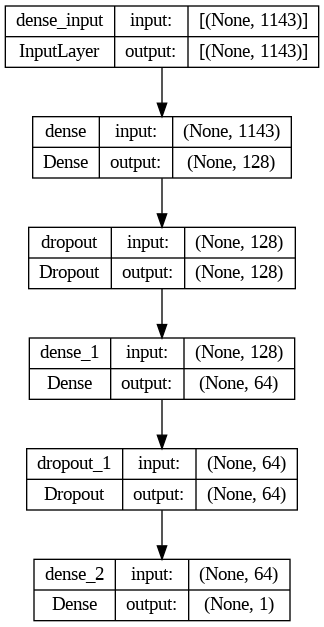

In [ ]:
# ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])

end_time = time.time()
ann_time = end_time - start_time

Epoch 1/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2152 - accuracy: 0.9197 - val_loss: 0.2818 - val_accuracy: 0.8889
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1849 - accuracy: 0.9332 - val_loss: 0.2946 - val_accuracy: 0.8850
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1575 - accuracy: 0.9435 - val_loss: 0.3086 - val_accuracy: 0.8825
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1334 - accuracy: 0.9525 - val_loss: 0.3357 - val_accuracy: 0.8849


In [ ]:
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)

print(f'Accuracy of the model = {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision = {(precision_score(y_test, y_pred))*100:.2f}%')
print(f'recall = {recall_score(y_test, y_pred)*100:.2f}%')
print(f'f1-score = {f1_score(y_test, y_pred)*100:.2f}%')

print('Confusion matrix:\n', confusion_matrix(y_test,y_pred))

print(f"Execution Time: {ann_time:.2f} seconds")


313/313 [==============================] - 1s 2ms/step
Accuracy of the model = 87.01%
Precision = 88.37%
recall = 85.44%
f1-score = 86.88%
Confusion matrix:
 [[4401  566]
 [ 733 4300]]
Execution Time: 28.76 seconds


Text(0.5, 1.0, 'Training and Validation Accuracy')

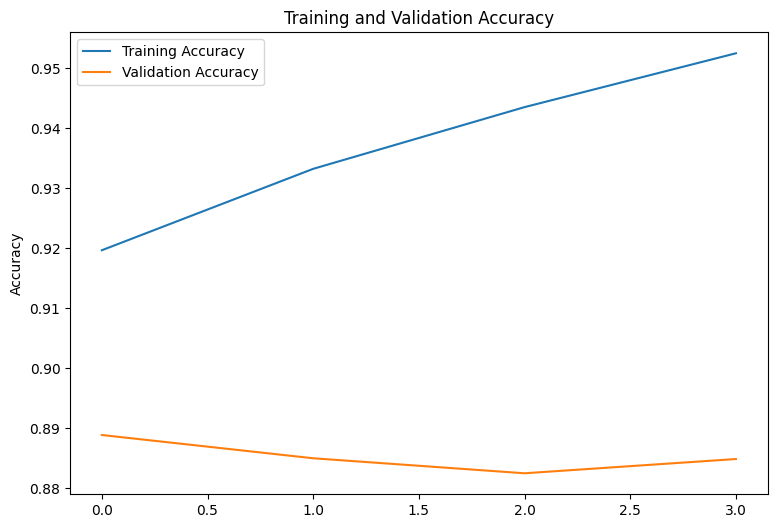

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

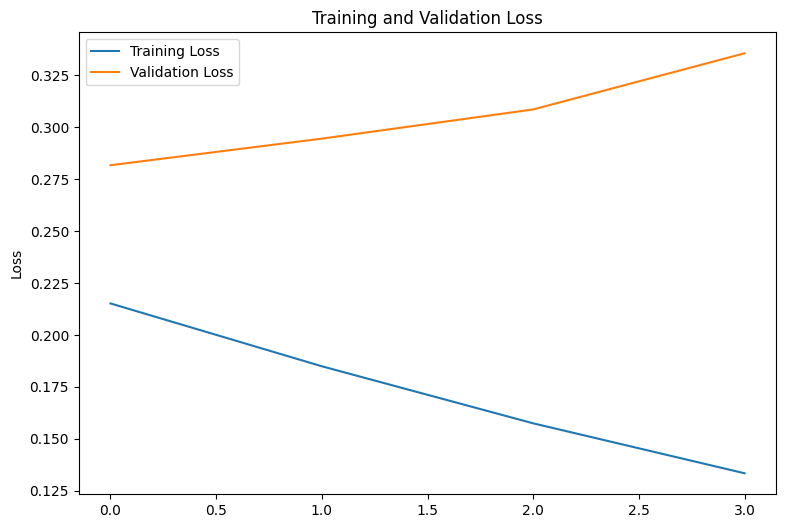

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

In [ ]:
import os
import joblib
from keras.models import load_model

In [ ]:
folder_path = '/content/gdrive/My Drive/Colab Notebooks/Data'
os.makedirs(folder_path, exist_ok=True)

model.save(os.path.join(folder_path, 'trained_model.h5'))
loaded_model = load_model(os.path.join(folder_path, 'trained_model.h5'))
joblib.dump(loaded_model, os.path.join(folder_path, 'dl_model.pkl'))